In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Télécharger le dataset à l'adresse suivante: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  
Charger l'archive dans vos Fichiers Colab puis dézippé la:

In [2]:
# Unzip data
# !unzip archive.zip

1. Créez un dataframe appelez *df* à partir du fichier weatherAUS.csv  
Affichez les 5 premières lignes.

In [3]:
# Read Data
df = pd.read_csv("weatherAUS.csv")
# Print head
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


2. Combien y'a t-il de lignes et de colonnes ?

In [4]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

145460
23


3. Printez quelques informations sur le dataframe

In [5]:
# Print some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

4. Affichez la description du dataframe

In [6]:
# Get some description of the columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


5. Affichez le nom des colonnes

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

6. Sélectionnez uniquement les colonnes suivantes:  
Date, Location, MinTemp, MaxTemp, Rainfall, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm

In [8]:
# List columns we want
colonnes = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

# Select only these columns
df = df[colonnes]

7. Affichez la nouvelle forme de *df* puis 7 de ces lignes de manière aléatoire.

In [9]:
# Print shape
print(df.shape)
# Print 7 random rows
df.sample(7)

(145460, 10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
113925,2015-08-01,Witchcliffe,9.5,13.9,4.0,NaN,69.0,72.0,1026.9,1027.7
111950,2009-12-06,Witchcliffe,13.7,22.4,0.0,NaN,75.0,61.0,1019.2,1018.4
29974,2016-12-06,Richmond,20.7,25.4,1.2,NaN,82.0,75.0,1011.9,1010.6
86894,2016-08-24,Brisbane,19.4,21.8,1.0,0.0,89.0,88.0,1008.3,1007.0
20870,2016-10-20,NorahHead,16.6,22.2,0.0,NaN,58.0,60.0,1024.2,1021.4
92629,2015-09-14,GoldCoast,13.6,25.3,0.0,NaN,61.0,61.0,1026.8,1023.5
47229,2012-05-30,Canberra,-3.1,14.7,0.0,6.4,95.0,46.0,1037.0,1032.9


8. Combien y'a t-il de NaN pour chaque colonne *df*

In [10]:
# Check NaN
print(df.isna().sum())

Date               0
Location           0
MinTemp         1485
MaxTemp         1261
Rainfall        3261
Sunshine       69835
Humidity9am     2654
Humidity3pm     4507
Pressure9am    15065
Pressure3pm    15028
dtype: int64


9. Réalisez la même opération mais affichez le pourcentage de NaN

In [11]:
# In percentage
print(df.isna().sum() / len(df))

Date           0.000000
Location       0.000000
MinTemp        0.010209
MaxTemp        0.008669
Rainfall       0.022419
Sunshine       0.480098
Humidity9am    0.018246
Humidity3pm    0.030984
Pressure9am    0.103568
Pressure3pm    0.103314
dtype: float64


10. Est-ce que des lignes sont dupliqués dans le dataframe?

In [12]:
# Check duplicated rows
df.duplicated().value_counts()

False    145460
dtype: int64

11. Supprimez le colonne 'Sunshine'.

In [13]:
# Delete Sunshine column
df = df.drop('Sunshine', axis=1)
df.shape

(145460, 9)

12. Affichez la liste des villes proposée dans le dataset.

In [14]:
# Names of the locations
print(df.Location.unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


13. Combien y'a t-il d'observations par ville ?

In [15]:
# Number of each location with NaN values
print(df.Location.value_counts(dropna=False))

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


14. Tracer un histogramme représentant la distribution des villes.

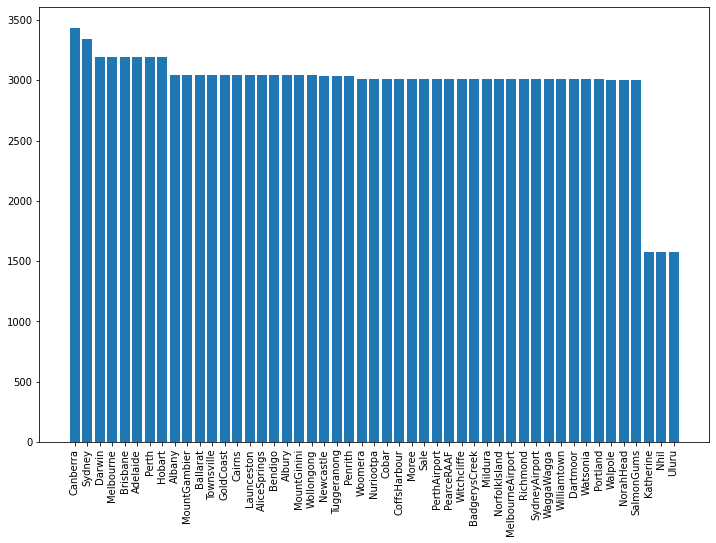

In [16]:
plt.figure(figsize=(12,8))
plt.bar(df.Location.value_counts().index, df.Location.value_counts().values)
plt.xticks(rotation='vertical')
plt.show()

15. Créez un dataframe appelez *sydney* contenant uniquement les observations pour la ville de Sydney. **Tips:** vous devrez peut être reset les index.

In [17]:
# Create a new dataframe with only Sydney
sydney = df[df.Location == "Sydney"]
# And reset the index
sydney = sydney.reset_index(drop=True)
# Print head
sydney.shape

(3344, 9)

16. Quelle est la date la plus ancienne et la plus récente pour ce nouveau dataframe

In [18]:
# Print max and min Date
print(sydney.Date.min())
print(sydney.Date.max())

2008-02-01
2017-06-25


17. Sur cette période de temps, quelle a été la température minimale moyenne, la médiane de la température maximale et la quantité totale de pluie tombée en mm?

In [19]:
# MinTemp moyenne
print(f'Température minimale moyenne: {sydney.MinTemp.mean()}')
# MaxTemp moyenne
print(f'Médiane de la température maximale: {sydney.MaxTemp.median()}')
# Sum Rainfall
print(f'Quantité de pluie tombée: {sydney.Rainfall.sum()}mm')

Température minimale moyenne: 14.866826347305384
Médiane de la température maximale: 22.8
Quantité de pluie tombée: 11094.0mm


18. Remplacer les valeurs manquantes pour Rainfall par la moyenne et pour MaxTemp par la médiane.

In [20]:
# Replace NaN
sydney.loc[:,'Rainfall'] = sydney.loc[:,'Rainfall'].fillna(sydney.Rainfall.mean())
sydney.loc[:,'MaxTemp'] = sydney.loc[:,'MaxTemp'].fillna(sydney.MaxTemp.median())
sydney.isna().sum()

Date            0
Location        0
MinTemp         4
MaxTemp         0
Rainfall        0
Humidity9am    15
Humidity3pm    13
Pressure9am    21
Pressure3pm    19
dtype: int64

19. Créer une colonne RainToday qui prend comme valeur 1 si Rainfall>0 et 0 si Rainfall==0. **Tips:** vous pouvez faire une boucle.

In [21]:
# Loop over sydney rows
for i in range(len(sydney)):
  if (sydney.loc[i,'Rainfall'] > 0):
    sydney.loc[i,'RainToday'] = 1
  else:
    sydney.loc[i,'RainToday'] = 0

# Print sample of sydney
sydney.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday
1430,2012-01-31,Sydney,25.3,28.8,0.0,50.0,68.0,1005.2,1008.0,0.0
52,2008-03-24,Sydney,18.5,24.3,17.0,95.0,72.0,1018.7,1015.3,1.0
2453,2015-01-17,Sydney,20.7,35.7,0.0,35.0,23.0,1008.0,1005.2,0.0
174,2008-07-24,Sydney,6.9,15.9,7.0,95.0,70.0,1029.3,1025.4,1.0
2292,2014-08-09,Sydney,8.9,19.2,0.0,94.0,62.0,1029.9,1024.7,0.0


20. Transformez la colonne RainToday en une colonne de type int

In [22]:
# Convert colum
sydney.RainToday = sydney.RainToday.astype(int)

21. Créez la colonne *Pressure* représentant la valeur moyenne des valeurs de Pressure9am et Pressure3pm :  
Pressure[i] = (Pressure9am[i] + Pressure3pm[i])/2

In [23]:
# Create Pressure column
sydney['Pressure'] = (sydney.Pressure9am + sydney.Pressure3pm)/2

22. Tracer la variation de *Pressure* du mois de janvier 2016

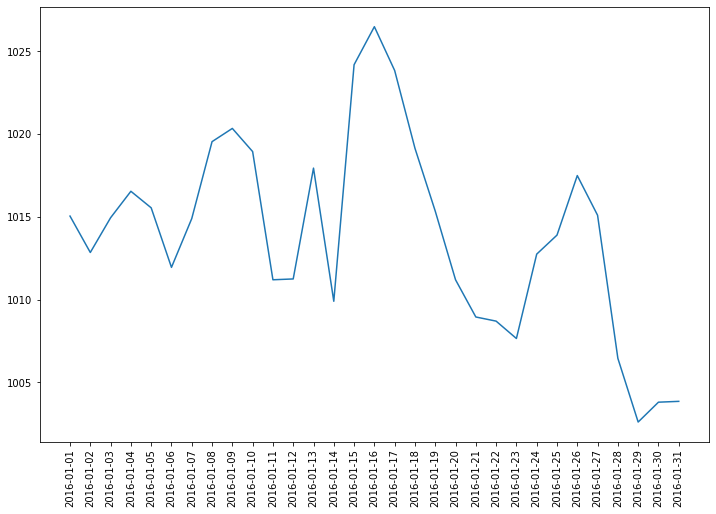

In [24]:
x = sydney[('2016-01-01' <= sydney.Date) & (sydney.Date < '2016-02-01')].Date.values
y = sydney[('2016-01-01' <= sydney.Date) & (sydney.Date < '2016-02-01')].Pressure

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.xticks(x, x, rotation='vertical')
plt.show()

23. Sur le même principe que pour le dataframe *sydney* créé le dataframe *Canberra*. (ne reproduisez pas toutes les modifications de colonnes comme réalisé sur *sydney*)

In [25]:
# Create Canberra
canberra = df[df.Location == 'Canberra']

24. Concaténez *sydney* et *canberra* suivant leurs lignes

In [26]:
# Concatenate sydney et canberra
sydney_canberra = pd.concat([sydney, canberra], axis=0)
sydney_canberra

,Date,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,Pressure
0,2008-02-01,Sydney,19.5,22.4,15.6,92.0,84.0,1017.6,1017.4,1.0,1017.50
1,2008-02-02,Sydney,19.5,25.6,6.0,83.0,73.0,1017.9,1016.4,1.0,1017.15
2,2008-02-03,Sydney,21.6,24.5,6.6,88.0,86.0,1016.7,1015.6,1.0,1016.15
3,2008-02-04,Sydney,20.2,22.8,18.8,83.0,90.0,1014.2,1011.8,1.0,1013.00
4,2008-02-05,Sydney,19.7,25.7,77.4,88.0,74.0,1008.3,1004.8,1.0,1006.55
...,...,...,...,...,...,...,...,...,...,...,...
49018,2017-06-21,Canberra,-2.4,14.7,0.2,99.0,50.0,1029.2,1026.5,NaN,NaN
49019,2017-06-22,Canberra,-0.4,13.9,0.0,99.0,56.0,1029.9,1025.6,NaN,NaN
49020,2017-06-23,Canberra,-2.9,13.3,0.4,99.0,54.0,1022.2,1016.6,NaN,NaN
49021,2017-06-24,Canberra,0.1,14.4,0.0,68.0,45.0,1017.5,1016.2,NaN,NaN


25. [Standardisez](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame) toutes les valeurs quantitatives de votre nouveau dataframe.

In [27]:
# Keep qualitative and binary columns
qual = sydney_canberra[['Date', 'Location', 'RainToday']]
# Standardize the others
sydney_canberra = (sydney_canberra-sydney_canberra.mean())/sydney_canberra.std()
# Drop useless columns
sydney_canberra = sydney_canberra.drop(['Date', 'Location', 'RainToday'], axis=1)
# Then concat qual and sydney_canberra using columns
sydney_canberra = pd.concat([qual, sydney_canberra], axis=1)
sydney_canberra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Date,Location,RainToday,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure,Pressure3pm,Pressure9am,Rainfall
0,2008-02-01,Sydney,1.0,1.902055,1.388972,0.070922,1.282104,0.046605,0.179890,-0.145971,1.616641
1,2008-02-02,Sydney,1.0,1.283065,0.801071,0.606119,1.282104,-0.003682,0.038756,-0.104644,0.429710
2,2008-02-03,Sydney,1.0,2.014599,1.127682,0.422145,1.591253,-0.147357,-0.074151,-0.269950,0.503893
3,2008-02-04,Sydney,1.0,2.239686,0.801071,0.137822,1.385154,-0.599935,-0.610460,-0.614339,2.012285
4,2008-02-05,Sydney,1.0,1.339337,1.127682,0.622844,1.311547,-1.526641,-1.598398,-1.427096,9.257511
...,...,...,...,...,...,...,...,...,...,...,...
49018,2017-06-21,Canberra,NaN,-0.011188,1.846228,-1.216894,-1.941879,NaN,1.464209,1.451992,-0.287394
49019,2017-06-22,Canberra,NaN,0.326443,1.846228,-1.350693,-1.647451,NaN,1.337188,1.548421,-0.312122
49020,2017-06-23,Canberra,NaN,0.213900,1.846228,-1.451043,-2.015485,NaN,0.066983,0.487704,-0.262667
49021,2017-06-24,Canberra,NaN,-0.292547,-0.178764,-1.267069,-1.573844,NaN,0.010529,-0.159746,-0.312122


26. Sauvegarder votre dataframe combinant *sydney* et *canberra*

In [28]:
sydney_canberra.to_csv('sydney_canberra.csv', sep=';', index=False)